In [6]:
import pandas as pd 
import numpy as np 
import yfinance as yf  
from datetime import datetime 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [11]:
data = yf.download('AAPL',"2015-01-01","2021-01-01")
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,133.294067,96452100
2020-12-31,134.080002,134.740005,131.720001,132.690002,132.267349,99116600


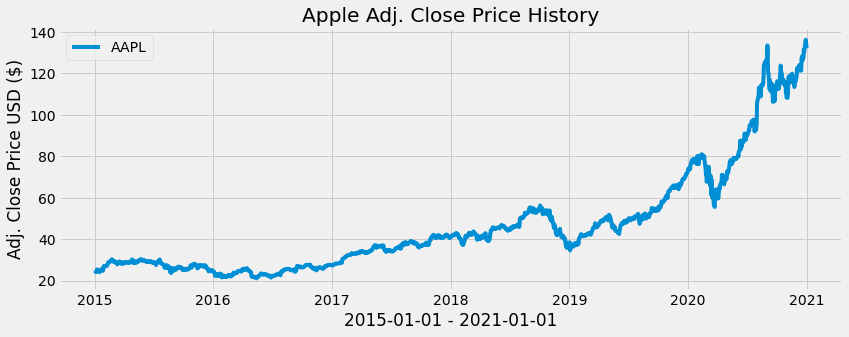

In [17]:
AAPL = data 

plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('2015-01-01 - 2021-01-01')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')

In [18]:
#Create the SMA with a 30 Day Length 

SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2020-12-24,122.119110
2020-12-28,122.699921
2020-12-29,123.218597


In [21]:
#Create 100 Day SMA 

SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window= 100).mean()
SMA100

,Adj Close
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2020-12-24,117.711152
2020-12-28,117.980439
2020-12-29,118.193442


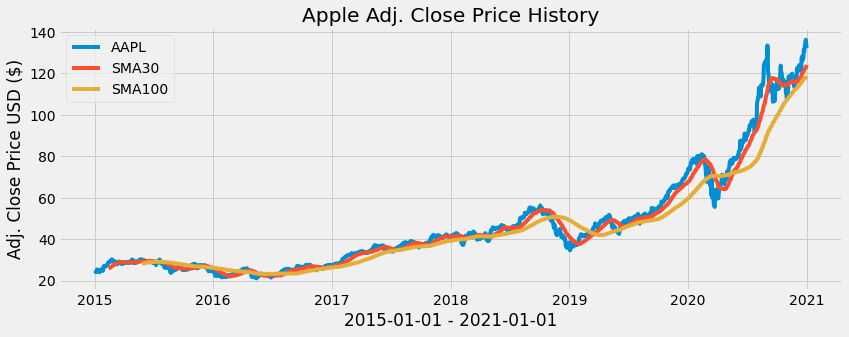

In [29]:
# Plot AAPl Adj Close w/ SMA 30 & SMA 100

plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('2015-01-01 - 2021-01-01')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')

In [32]:
data2 = pd.DataFrame()
data2['AAPL'] = AAPL['Adj Close']
data2['SMA30']= SMA30['Adj Close']
data2['SMA100'] = SMA100['Adj Close']
data2

,AAPL,SMA30,SMA100
Date,,,
2015-01-02,24.819241,NaN,NaN
2015-01-05,24.120045,NaN,NaN
2015-01-06,24.122320,NaN,NaN
2015-01-07,24.460564,NaN,NaN
2015-01-08,25.400398,NaN,NaN
...,...,...,...
2020-12-24,131.549637,122.119110,117.711152
2020-12-28,136.254608,122.699921,117.980439
2020-12-29,134.440399,123.218597,118.193442


In [49]:
#Create a function to signal when to buy and sell

def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell= []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [50]:
buy_sell = buy_sell(data2)
data2['Buy_Signal_Price'] = buy_sell[0]
data2['Sell_Signal_Price'] = buy_sell[1]

In [51]:
data2

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2015-01-02,24.819241,NaN,NaN,NaN,NaN
2015-01-05,24.120045,NaN,NaN,NaN,NaN
2015-01-06,24.122320,NaN,NaN,NaN,NaN
2015-01-07,24.460564,NaN,NaN,NaN,NaN
2015-01-08,25.400398,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,131.549637,122.119110,117.711152,NaN,NaN
2020-12-28,136.254608,122.699921,117.980439,NaN,NaN
2020-12-29,134.440399,123.218597,118.193442,NaN,NaN


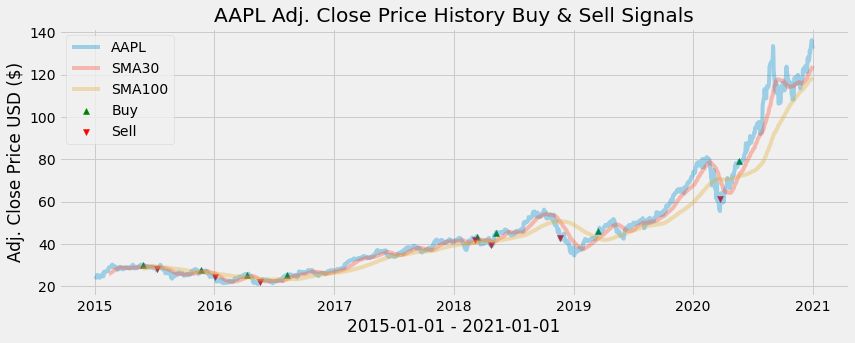

In [52]:
plt.figure(figsize=(12.6, 4.6))
plt.plot(data2['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data2['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data2['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data2.index, data2['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data2.index, data2['Sell_Signal_Price'], label = 'Sell', marker='v', color = 'red')
plt.title('AAPL Adj. Close Price History Buy & Sell Signals')
plt.xlabel('2015-01-01 - 2021-01-01')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()